In [29]:
from RandAugment import RandAugment
import torchvision
import matplotlib.pyplot as plt
import torch
import numpy as np
from torchvision.utils import make_grid
# import importlib
# importlib.reload(RandAugment)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
def show(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

In [150]:
from torchvision.transforms import transforms
from RandAugment import RandAugment

transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
#     transforms.RandomHorizontalFlip(),
#     transforms.ToTensor(),
    
#     torchvision.transforms.RandomResizedCrop(size=32, scale=(0.2, 1.0)),
#     torchvision.transforms.ColorJitter(0.4, 0.4, 0.4, 0.4),
    torchvision.transforms.RandomGrayscale(p=0.1),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.ToTensor(),
#     transforms.Normalize(_CIFAR_MEAN, _CIFAR_STD),
])

# Add RandAugment with N, M(hyperparameter)
transform_train.transforms.insert(0, RandAugment(3, 2))
test_augment = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
old_augment = torchvision.transforms.Compose(
        [
            torchvision.transforms.RandomResizedCrop(size=32, scale=(0.2, 1.0)),
            torchvision.transforms.ColorJitter(0.4, 0.4, 0.4, 0.4),
            torchvision.transforms.RandomGrayscale(p=0.2),
            torchvision.transforms.RandomHorizontalFlip(),
            torchvision.transforms.ToTensor(),
        ]
    )

In [151]:
train_dataset = torchvision.datasets.CIFAR10(root='../data/', train=True, download=True, transform=transform_train)
train_dataset_noaug = torchvision.datasets.CIFAR10(root='../data/', train=True, download=True, transform=test_augment)
train_dataset_oldaug = torchvision.datasets.CIFAR10(root='../data/', train=True, download=True, transform=old_augment)
train_dataset_heavyaug = torchvision.datasets.CIFAR10(root='../data/', train=True, download=True, transform=tfs)


Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [152]:
transform_train.transforms

 RandomCrop(size=(32, 32), padding=4),
 RandomGrayscale(p=0.1),
 RandomHorizontalFlip(p=0.5),
 ToTensor()]

In [153]:
dataloader_train = torch.utils.data.DataLoader(train_dataset, batch_size=70, shuffle=False, num_workers=0)
dataloader_train_noaug = torch.utils.data.DataLoader(train_dataset_noaug, batch_size=70, shuffle=False, num_workers=0)
dataloader_train_oldaug = torch.utils.data.DataLoader(train_dataset_oldaug, batch_size=70, shuffle=False, num_workers=0)
dataloader_train_heavyaug = torch.utils.data.DataLoader(train_dataset_heavyaug, batch_size=70, shuffle=False, num_workers=0)

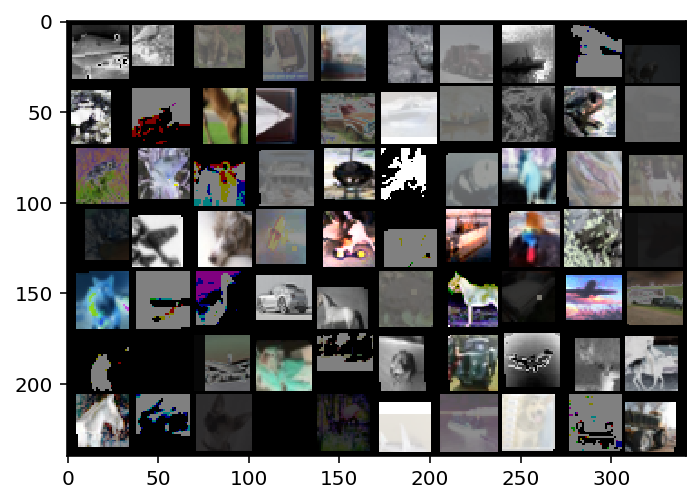

In [154]:
cut = 10
for i, (img, _) in enumerate(dataloader_train):
    if i == cut:
        break
show(make_grid(img, 10))

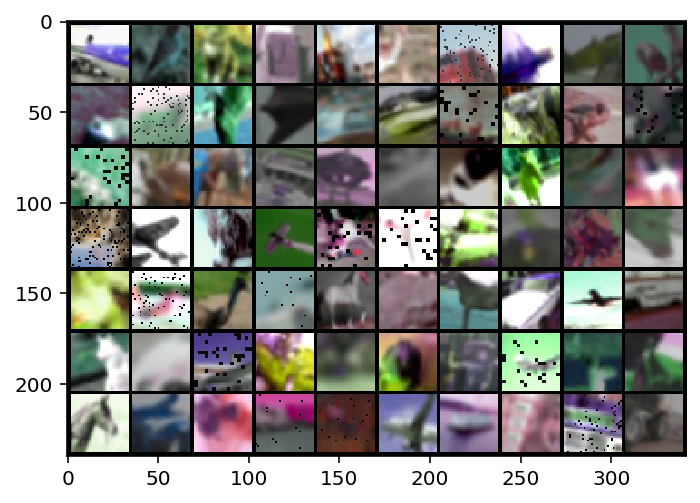

In [158]:
for i, (img, _) in enumerate(dataloader_train_heavyaug):
    if i == cut:
        break
show(make_grid(img, 10))

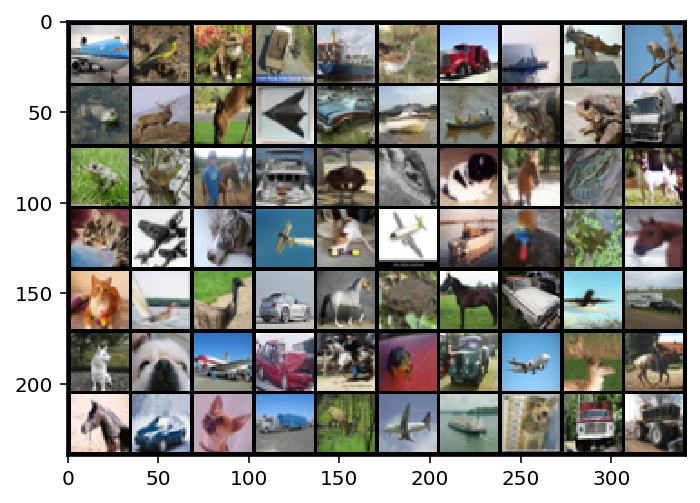

In [156]:
for i, (img, _) in enumerate(dataloader_train_noaug):
    if i == cut:
        break
show(make_grid(img, nrow=10))

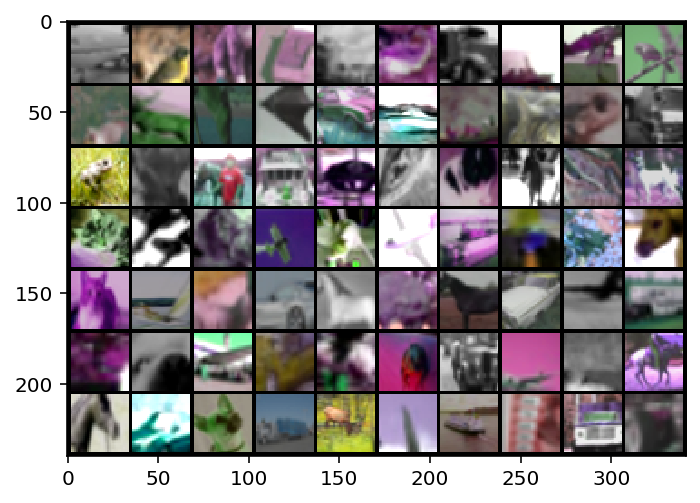

In [157]:
for i, (img, _) in enumerate(dataloader_train_oldaug):
    if i == cut:
        break
show(make_grid(img, nrow=10))

In [121]:
from imgaug import augmenters as iaa
import imgaug as ia

def show_dataset(dataset, n=6, no_of_images=10):
    imgs = torch.stack([dataset[i][0] for _ in range(n)
                       for i in range(no_of_images)])
    grid = make_grid(imgs).numpy()
    plt.imshow(np.transpose(grid, (1, 2, 0)), interpolation='nearest')
    plt.axis('off')

In [146]:
class ImgAugTransform:
    def __init__(self):
        self.aug = iaa.Sequential([
#             iaa.Resize((224, 224)),
            iaa.Sometimes(0.25, iaa.GaussianBlur(sigma=(0, 3.0))),
            iaa.Fliplr(0.5),
            iaa.Flipud(0.1), # vertically flip 20% of all images
            iaa.Affine(rotate=(-20, 20),  
                       shear=(-8, 8), 
                       translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
                       mode='symmetric'),
#             iaa.SaltAndPepper(p=(0, 0.1)),
#             iaa.Sometimes(0.1,
#                           iaa.OneOf([iaa.Dropout(p=(0, 0.1)),
#                                      iaa.CoarseDropout(0.1, size_percent=0.5)])),
            
            iaa.LinearContrast((0.5, 2.0), per_channel=0.5),
            sometimes(
                    iaa.ElasticTransformation(alpha=(0.5, 3.5), sigma=0.25)
                ),
            iaa.Grayscale(alpha=(0.0, 1.0)),
#             sometimes(iaa.PiecewiseAffine(scale=(0.01, 0.05))),
#             iaa.Multiply((0.8, 1.2), per_channel=0.2),
            iaa.ContrastNormalization((0.75, 1.5)),
            
#             iaa.AddToHueAndSaturation(value=(-10, 10), per_channel=True)
        ], random_order=True)
        self.aug1 = seq
        self.aug2 = iaa.Sequential([
#             iaa.Scale((224, 224)),
            iaa.Sometimes(0.25, iaa.GaussianBlur(sigma=(0, 3.0))),
            iaa.Fliplr(0.5),
            iaa.Affine(rotate=(-20, 20), mode='symmetric'),
            iaa.Sometimes(0.25,
                          iaa.OneOf([iaa.Dropout(p=(0, 0.1)),
                                     iaa.CoarseDropout(0.1, size_percent=0.5)])),
            iaa.AddToHueAndSaturation(value=(-10, 10), per_channel=True)
        ])
      
    def __call__(self, img):
        img = np.array(img)
#         return self.aug1.augment_image(img)
        return self.aug2.augment_image(img)

tfs = torchvision.transforms.Compose([
    torchvision.transforms.RandomResizedCrop(size=32, scale=(0.2, 1.0)),
    ImgAugTransform(),
    torchvision.transforms. ToPILImage(),
    torchvision.transforms.ColorJitter(0.4, 0.4, 0.4, 0.4),
    torchvision.transforms.ToTensor()
])

In [147]:
sometimes = lambda aug: iaa.Sometimes(0.5, aug)

# Define our sequence of augmentation steps that will be applied to every image.
seq = iaa.Sequential(
    [
        #
        # Apply the following augmenters to most images.
        #
        iaa.Fliplr(0.5), # horizontally flip 50% of all images
        iaa.Flipud(0.2), # vertically flip 20% of all images

        # crop some of the images by 0-10% of their height/width
        sometimes(iaa.Crop(percent=(0, 0.1))),

        # Apply affine transformations to some of the images
        # - scale to 80-120% of image height/width (each axis independently)
        # - translate by -20 to +20 relative to height/width (per axis)
        # - rotate by -45 to +45 degrees
        # - shear by -16 to +16 degrees
        # - order: use nearest neighbour or bilinear interpolation (fast)
        # - mode: use any available mode to fill newly created pixels
        #         see API or scikit-image for which modes are available
        # - cval: if the mode is constant, then use a random brightness
        #         for the newly created pixels (e.g. sometimes black,
        #         sometimes white)
        sometimes(iaa.Affine(
            scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
            translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
            rotate=(-45, 45),
            shear=(-16, 16),
            order=[0, 1],
            cval=(0, 255),
            mode=ia.ALL
        )),

        #
        # Execute 0 to 5 of the following (less important) augmenters per
        # image. Don't execute all of them, as that would often be way too
        # strong.
        #
        iaa.SomeOf((0, 5),
            [
                # Convert some images into their superpixel representation,
                # sample between 20 and 200 superpixels per image, but do
                # not replace all superpixels with their average, only
                # some of them (p_replace).
                sometimes(
                    iaa.Superpixels(
                        p_replace=(0, 1.0),
                        n_segments=(20, 200)
                    )
                ),

                # Blur each image with varying strength using
                # gaussian blur (sigma between 0 and 3.0),
                # average/uniform blur (kernel size between 2x2 and 7x7)
                # median blur (kernel size between 3x3 and 11x11).
                iaa.OneOf([
                    iaa.GaussianBlur((0, 3.0)),
                    iaa.AverageBlur(k=(2, 7)),
                    iaa.MedianBlur(k=(3, 11)),
                ]),

                # Sharpen each image, overlay the result with the original
                # image using an alpha between 0 (no sharpening) and 1
                # (full sharpening effect).
                iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)),

                # Same as sharpen, but for an embossing effect.
                iaa.Emboss(alpha=(0, 1.0), strength=(0, 2.0)),

                # Search in some images either for all edges or for
                # directed edges. These edges are then marked in a black
                # and white image and overlayed with the original image
                # using an alpha of 0 to 0.7.
                sometimes(iaa.OneOf([
                    iaa.EdgeDetect(alpha=(0, 0.7)),
                    iaa.DirectedEdgeDetect(
                        alpha=(0, 0.7), direction=(0.0, 1.0)
                    ),
                ])),

                # Add gaussian noise to some images.
                # In 50% of these cases, the noise is randomly sampled per
                # channel and pixel.
                # In the other 50% of all cases it is sampled once per
                # pixel (i.e. brightness change).
                iaa.AdditiveGaussianNoise(
                    loc=0, scale=(0.0, 0.05*255), per_channel=0.5
                ),

                # Either drop randomly 1 to 10% of all pixels (i.e. set
                # them to black) or drop them on an image with 2-5% percent
                # of the original size, leading to large dropped
                # rectangles.
                iaa.OneOf([
                    iaa.Dropout((0.01, 0.1), per_channel=0.5),
                    iaa.CoarseDropout(
                        (0.03, 0.15), size_percent=(0.02, 0.05),
                        per_channel=0.2
                    ),
                ]),

                # Invert each image's channel with 5% probability.
                # This sets each pixel value v to 255-v.
                iaa.Invert(0.05, per_channel=True), # invert color channels

                # Add a value of -10 to 10 to each pixel.
                iaa.Add((-10, 10), per_channel=0.5),

                # Change brightness of images (50-150% of original value).
                iaa.Multiply((0.5, 1.5), per_channel=0.5),

                # Improve or worsen the contrast of images.
                iaa.LinearContrast((0.5, 2.0), per_channel=0.5),

                # Convert each image to grayscale and then overlay the
                # result with the original with random alpha. I.e. remove
                # colors with varying strengths.
                iaa.Grayscale(alpha=(0.0, 1.0)),

                # In some images move pixels locally around (with random
                # strengths).
                sometimes(
                    iaa.ElasticTransformation(alpha=(0.5, 3.5), sigma=0.25)
                ),

                # In some images distort local areas with varying strength.
                sometimes(iaa.PiecewiseAffine(scale=(0.01, 0.05)))
            ],
            # do all of the above augmentations in random order
            random_order=True
        )
    ],
    # do all of the above augmentations in random order
    random_order=True
)

In [148]:
dataset = torchvision.datasets.CIFAR10(root='../data/', train=True, download=True, transform=tfs)

Files already downloaded and verified


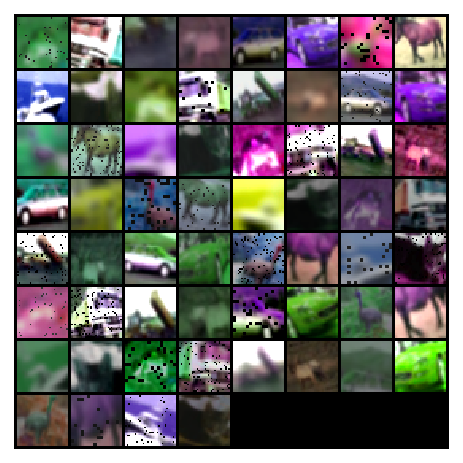

In [149]:
show_dataset(dataset)

In [75]:
dataset[0][0].shape

torch.Size([3, 32, 32])

In [ ]:
torch.from_numpy()